# Assignment 3
Realfagslektormaster, programing course

Author: Paul Knutson

## Error approximations
> Since errors approximations are not asked for in all the tasks, these are not included generally.

When performing estimations using numerical methods, error approxmations can be needed to evaluate how many iterations are neccessary, how fast different methods converge towards the correct value (or indeed if they at all do).

Absolute errors are the absolute difference beteen the estimate and the correct answer.


If you get a question, where the answer is $10000$, and you guess $9000$, it is $1000$ off, and $90 \%$ or $0.9$ of the right answer. In this example, $1000$ is the absolute error and $1 - 0.9$ is the relative error. Depending on the context, either of these can be interesting.

The absolute error is found by:
$$ \epsilon_a = |x - \widetilde{x}| $$

The relative error can be found like this:
$$ \epsilon_r = \frac{\epsilon_a}{|x|} = |\frac{x - \widetilde{x}}{x}| $$

Where $\widetilde{x}$ is the approximation of $x$.

### Error example
You are asked to estimate the amount of citizens in a town of $10000$.
You guess $9000$.

The absolute error is
$$ \epsilon_a = |x - \widetilde{x}| = |10000 - 9000| = 1000 $$


While the relative error is
$$ \epsilon_r = \frac{\epsilon_a}{|x|} = \frac{1000}{|10000|} = \frac{1000}{10000} = \frac{1}{10} = 0.1 $$

And for good measures, the percent error is
$$ \epsilon_p = 100 \% \times \epsilon_r = 100 \% \times 0.1 = 10 \% $$

## 1a
Take advantage of Newton's method for finding $f(x) = 0$ for $(i)$, $(ii)$ and $(iii)$.

Newtons method uses the following iterative process to better an estimation of the $x$ value of the $x$ intersection.

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

The examples has been ran through 100 iterations, but much less will usually suffice quite well, depending on the required accuracy.

You can not guarantee finding all $x$ intersections using Newton's method. If this is needed, graphical methods may be helpful. A very small step size for starting points Newton's method will also make it more likely all or most points will be found.

During the lines of code, some may give warning messages. This is due to difficulty suppressing Jupyter's arithmetic warnings for illegal expressions. Things like $\frac{x}{0}$ or $ln(0)$. They should be ignored.

In [27]:
def newtons_method(f, df, x):
    for i in range(100):
        with np.errstate(divide='raise'):
            try:
                x = x - f(x) / df(x)
            except FloatingPointError:
                pass
    return x

To find all points (both $x$ intersections and stationary points), run the functions systematically with all values of $x$ (or $x_0$.
Then make a list of uniques (after rounding off). This can be done as following:

- Run Newton's method for initial x values spread in the relevant area, and save all found values in a list. (There will be mostly copies here.)
- Round off all numbers in the list to an acceptable accuracy. This needs to remove any absolute errors, and it will thus have to round off more than the estimated accuracy of the method.
- Remove copies from the list.

Then you should be left with the correct values for $x$ intersections.

In [28]:
def find_x_intersects(f, df, min_x=-10, max_x=10):
    accuracy = 101
    val_range = max_x - min_x
    x_values = np.linspace(min_x - 1.5*val_range, max_x + 1.5*val_range, accuracy)
    x_intersects = [0]*accuracy
    
    for i in range(len(x_values)):
        x = x_values[i]
        val = newtons_method(f, df, x)
        if val and not np.isnan(val) and np.isfinite(f(val)):
            x_intersects[i] = round(val, 3)
    
    x_intersects = list( dict.fromkeys(x_intersects) )
    
    i = 0
    while i < len(x_intersects):
        if x_intersects[i] > max_x or x_intersects[i] < min_x:
            del x_intersects[i]
        else:
            i += 1
    
    return x_intersects

Function to make a bunch of $x$-values into a bunch of points, using the function $f$.

In [29]:
def pointifyer(xs, f, retrn=False):
    points = []
    for i in range(len(xs)):
        points.append([xs[i], f(xs[i])])
    
    if not retrn:
        for i in range(len(xs)):
            print("(" + str(round(points[i][0], 2)) + ", " + str(round(points[i][1], 3)) + ")")
    else:
        return points

This function three functions on top of each other. It is used to plot functions, their derivatives, and their double derivatives.

In [30]:
import matplotlib.pyplot as plt

def plot(f, g, h, min_x=-10, max_x=10):
    x = np.linspace(min_x, max_x, 201)
    
    plt.grid()
    #plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
    plt.plot(x, f(x))
    plt.plot(x, g(x))
    plt.plot(x, h(x))
    plt.legend(["f", "df", "ddf"])
    plt.show()

### $(i)$
$$ f(x) = x^4 -5x^2 - 2x + 3 $$

In [31]:
import numpy as np

def f(x):
    return x**4 - 5*x**2 - 2*x + 3

def df(x):
    return 4*x**3 - 10*x - 2

x = find_x_intersects(f, df, -10, 10)
print("x-intersections: " + str(len(x)))
print(x)

x-intersections: 4
[-1.618, -1.303, 0.618, 2.303]


### $(ii)$
$$ f(x) = ln(x^3 + 1) - \frac{-x^2}{2} $$

In [32]:
import numpy as np

def g(x):
    return np.log(x**3 + 1) - x**2/2

def dg(x):
    return x*(3*x/(x**3 + 1) - 1)

x = find_x_intersects(g, dg, -10, 10)
print("x-intersections: " + str(len(x)))
print(x)

x-intersections: 3
[0, 0.538, 2.236]


D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


### $(iii)$
$$ f(x) = cos \bigg( \frac{e^{sin(x)}}{x^3 + 1} - x^2 \bigg) -\frac{1}{2}, -1 < x \leq \pi $$


In [33]:
import numpy as np

def f(x):
    return np.cos(np.e**np.sin(x)/(x**3 + 1)) - 1/2

def df(x):
    return -(np.e**np.sin(x)*(-3*x**2 + (1 + x**3)*np.cos(x))*np.sin(np.e**np.sin(x)/(1 + x**3)))/(1 + x**3)**2

x = find_x_intersects(f, df, -10, 10)
print("x-intersections: " + str(len(x)))
print(x)

##  Med x=-1 får du problemer grunnet at både f og df
##  har nevnere x^3 + 1. Hvis x=-1 får du
##  (-1)^3 + 1 = -1 + 1 = 0. Deling på 0 er ikke definert,
##  og f og df er derfor ikke definert når x=-1.

x-intersections: 4
[0, -0.813, 0.046, 1.099]


D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys
D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


$(ii)$ and $(iii)$ are both problematic at $x = -1$ as $g(x) = x^3 + 1$ becomes $0$. 
$$ g(-1) = (-1)^3 + 1 = -1 + 1  = 0 $$
Neither $\frac{x}{y}$ nor $ln(y)$ are well defined when $y = 0$.

## 1b
Stationary points are points where the lines are horizontal. I.e. $f'(x) = 0$.
We know how to find a functions $x$ intersections, as we have already done it in 1a.
If we set $f'(x) = g(x)$, all we need to do is find $g'(x) = f''(x)$ (the function's double derivatives), and run it through the same function.

### $(i)$
$$ f(x) = x^4 -5x^2 - 2x + 3 $$

$$ f'(x) = 4x^3 - 10x - 2 $$

$$ f''(x) = 12x^2 - 10 $$

(-1.47, -0.195)
(-0.2, 3.202)
(1.67, -6.507)


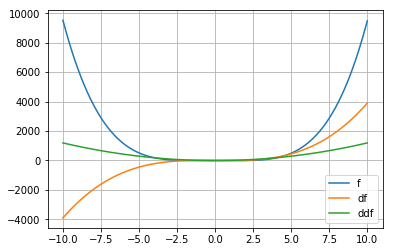

In [34]:
def f(x):
    return x**4 - 5*x**2 - 2*x + 3


def df(x):
    return 4*x**3 - 10*x - 2


def ddf(x):
    return 12*x**2 - 10


xs = find_x_intersects(df, ddf)
pointifyer(xs, f)
plot(f, df, ddf)

### $(ii)$
$$ g(x) = ln(x^3 + 1) - \frac{-x^2}{2} $$

$$ g'(x) = x \bigg( \frac{3x}{x^3 + 1} - 1 \bigg) $$

$$ g''(x) = \frac{x^6 + 3x^4 + 2x^3 - 6x + 1}{(x^3 + 1)^2} $$

(0, 0.0)


D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


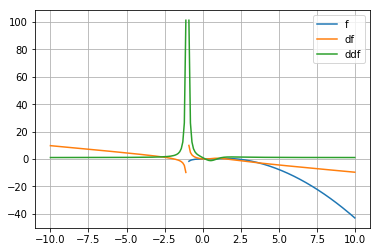

In [35]:
def g(x):
    return np.log(x**3 + 1) - x**2/2


def dg(x):
    return x*( (3*x)/(x**3 + 1) -1)


def ddg(x):
    return (x**6 + 3*x**4 + 2*x**3 - 6*x + 1) / (x**3 + 1)**2


xs = find_x_intersects(dg, ddg)
pointifyer(xs, g)
plot(g, dg, ddg)

### $(iii)$
$$ f(x) = cos \bigg( \frac{e^{sin(x)}}{x^3 + 1} - x^2 \bigg) -\frac{1}{2}, -1 < x \leq \pi $$

$$ f'(x) = \frac{e^{sin(x)} \bigg(-3x^2 + (1 + x^3)cos(x) \bigg) sin\bigg( \frac{e^{sin(x)}}{1 + x^3} \bigg) }{(1 + x^3)^2} $$

$$ f''(x) = ? $$

Due to the sheer size of both $g(x)$ and, especially, $g'(x)$, df is defined on the definition of the derivative, instead of beind based on an algebraic solution.

$$ \frac{dy}{dx} \lim_{h \to 0} \frac{f(x+h) + f(x)}{h} $$

[-14.348, -10.711, -8.228, -3.106, -0.504, 5.308, 11.265, 13.92, 17.451]


D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sin
  This is separate from the ipykernel package so we can avoid doing imports until


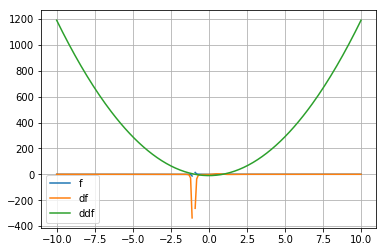

In [36]:
def f(x):
    # Copy to Wolfram Alpha: -(e^sin(x)*(-3*x^2 + (1 + x^3)*cos(x))*sin(e^sin(x)/(1 + x^3)))/(1 + x^3)^2
    return -(np.e**np.sin(x)*(-3*x**2 + (1 + x**3)*np.cos(x))*np.sin(np.e**np.sin(x)/(1 + x**3)))/(1 + x**3)**2


def df(x):
    h = 1/10000
    dy = (f(x+h) - f(x))/h
    return dy


print(find_x_intersects(f, df, -20, 20))
plot(f, df, ddf)

## 2a
The continued fraction $\frac{1}{2 + \frac{3}{4 + \frac{5}{6}}}$ can be shortened to $\frac{29}{76}$. Proof below.

$$ \frac{1}{2 + \frac{3}{4 + \frac{5}{6}}}
=
\frac{1}{2 + \frac{3}{\frac{4 \times 6}{1 \times 6} + \frac{5}{6}}}
=
\frac{1}{2 + \frac{3}{\frac{24}{6} + \frac{5}{6}}}
=
\frac{1}{2 + \frac{3}{\frac{24 + 5}{6}}}
=
\frac{1}{2 + \frac{3}{\frac{29}{6}}}
=
\frac{1}{2 + \frac{3 \times 6}{29}}
=
\frac{1}{2 + \frac{18}{29}}
=
\frac{1}{\frac{2 \times 29}{1 \times 29} + \frac{18}{29}}
=
\frac{1}{\frac{58}{29} + \frac{18}{29}}
=
\frac{1}{\frac{58 + 18}{29}}
=
\frac{1}{\frac{76}{29}}
=
\frac{29}{76}
\simeq
0.38157894736 $$

In [37]:
print(1/(2 + 3/(4 + 5/6)))

0.3815789473684211


In [38]:
a = 5/6
b = 4 + a
c = 3/b
d = 2 + c
e = 1/d

print(e)

0.3815789473684211


In [39]:
def recursive_fraction(max_val, i=0):
    if i >= max_val:
        return max_val
    
    return i + (i+1)/recursive_fraction(max_val, i+2)


print(recursive_fraction(6))

0.3815789473684211


In [40]:
import math

def continued_fraction(nums, i=0):
    if i >= len(nums) -1:
        return 1/nums[i]
    
    return nums[i] + 1/continued_fraction(nums, i+1)

## 2d
$$ \sqrt{2} \simeq [1,2,2,2,2,2,2,2, ...] $$

In [41]:
print("x:\t", math.sqrt(2))
print("x_est:\t", continued_fraction([1,2,2,2,2,2,2,2,2]))
print("e_r:\t", abs(1 - math.sqrt(2)/continued_fraction([1,2,2,2,2,2,2,2,2])))

x:	 1.4142135623730951
x_est:	 1.4142091152815013
e_r:	 3.1445785109163182e-06


## 2e
$$ \sqrt{3} \simeq [1,1,2,1,2,1,2,1,2,1, ...] $$

In [42]:
print("x:\t", math.sqrt(3))
print("x_est:\t", continued_fraction([1,1,2,1,2,1,2,1,2]))
print("e_r:\t", abs(1 - math.sqrt(3)/continued_fraction([1,1,2,1,2,1,2,1,2])))

x:	 1.7320508075688772
x_est:	 1.7318840579710146
e_r:	 9.628219458179821e-05


## 2f
$$ \pi\simeq [3,7,15,1,292,1,1,1,2, ...] $$

In [43]:
print("x:\t", math.pi)
print("x_est:\t", continued_fraction([3,7,15,1,292,1,1,1,2])) #.. ,1,3,1]))
print("e_r:\t", abs(1 - math.pi/continued_fraction([3,7,15,1,292,1,1,1,2])))

x:	 3.141592653589793
x_est:	 3.141592653532386
e_r:	 1.827316076230545e-11


## 2x (bonus)
$$ e \simeq [2,1,2,1,1,4,1,1,6,1,1,8, ...] $$

In [44]:
print("x:\t", math.e)
print("x_est:\t", continued_fraction([2,1,2,1,1,4,1,1,6,1,1,8]))
print("e_r:\t", abs(1 - math.e/continued_fraction([2,1,2,1,1,4,1,1,6,1,1,8])))

x:	 2.718281828459045
x_est:	 2.718283229343921
e_r:	 5.153564798243693e-07


$$ \phi\simeq [1,1,1,1,1,1,1,1,1,1,1, ...] $$

In [45]:
golden_ratio = (1 + math.sqrt(5))/2
print("x:\t", golden_ratio)
print("x_est:\t", continued_fraction([1,1,1,1,1,1,1,1,1,1,1,1,1,1]))
print("e_r:\t", abs(1 - golden_ratio/continued_fraction([1,1,1,1,1,1,1,1,1,1,1,1,1,1])))

x:	 1.618033988749895
x_est:	 1.6180371352785146
e_r:	 1.9446578518600433e-06


## 2g

Geometric plotting of (estimated) values.

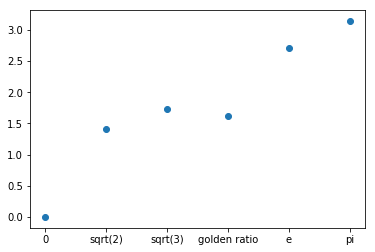

In [46]:
x = ["0", "sqrt(2)", "sqrt(3)", "golden ratio", "e", "pi"]
y = [0,
    continued_fraction([1,2,2,2,2,2,2,2,2]),
    continued_fraction([1,1,2,1,2,1,2,1,2]),
    continued_fraction([1,1,1,1,1,1,1,1,1,1,1,1,1,1]),
    continued_fraction([2,1,2,1,1,4,1,1,6,1,1,8]),
    continued_fraction([3,7,15,1,292,1,1,1,2])]
plt.scatter(x, y)
plt.show()

## 3a

This dynamic system can be described as perdiodic, as every few points will overlap and make an orbit around the "lap". Because of this, it does not matter if you find the first $10$ or $1000$ points. If you have found the first 6 points, you have, quite literally, found them all (assuming perfect floating point accuracy, of course).

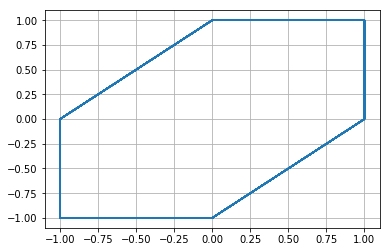

In [55]:
a = 1
b = -1
c = 1
d = 0

def F(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]

def F2(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]


X = [1]
Y = [1]


for i in range(100):
    point = F2([X[i], Y[i]])
    #points.append(F(points[i]))
    X.append(point[0])
    Y.append(point[1])


# Plotting
import matplotlib.pyplot as plt

plt.grid()
plt.plot(X, Y)
plt.show()

## 3b
Below you can see a diagram showing $d \in [-0.5, 0.5]$.
As $d$ goes towards $0.5$, it (very slowly) spirals out. A linspace with 10 values will not show _any_ variance from just $d = 0.5$. Turn it up to $100$, and suddenly you can see the lines with the last $d$s at almost $0.5$.

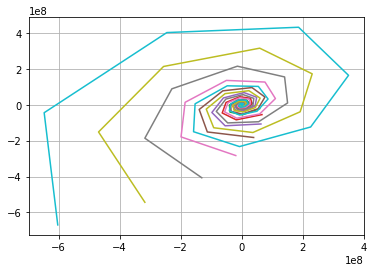

In [48]:
import matplotlib.pyplot as plt
import numpy as np


a = 1
b = -1
c = 1
d = 0


def F(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]


def F2(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.grid(True)

ds = np.linspace(-0.5, 0.5, 100)
for j in range(len(ds)):
    d = ds[j]
    
    X = [1]
    Y = [1]

    for i in range(100):
        point = F2([X[i], Y[i]])
        X.append(point[0])
        Y.append(point[1])
    
    ax1.plot(X, Y)

    #plt.legend(ds)
    ds[j] = round(ds[j], 2)

fig.show()

## 3c

By changing whether the varying variable in the j-loop is the $a$, $b$, $c$ or $d$ variable, you get different values, as shown below. The code is the same for all variables.
As can be seen, $b$ and $c$ has a relatively low affect on the system, while $d$ and $a$ has a much bigger effect.

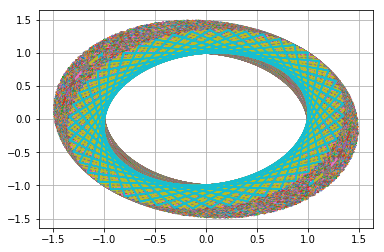

In [49]:
import matplotlib.pyplot as plt
import numpy as np


a = 1
b = -1
c = 1
d = 0


def F(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]


def F2(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.grid(True)

ds = np.linspace(-0.2, 0.2, 200)
for j in range(len(ds)):
    a = ds[j]
    
    X = [1]
    Y = [1]

    for i in range(100):
        point = F2([X[i], Y[i]])
        X.append(point[0])
        Y.append(point[1])
    
    ax1.plot(X, Y)

    #plt.legend(ds)
    ds[j] = round(ds[j], 2)

fig.show()

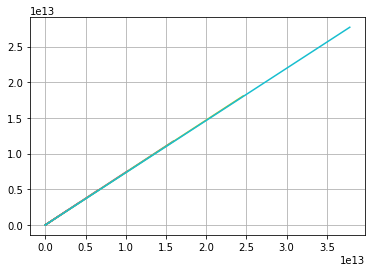

In [50]:
import matplotlib.pyplot as plt
import numpy as np


a = 1
b = -1
c = 1
d = 0


def F(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]


def F2(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.grid(True)

ds = np.linspace(-0.5, 0.5, 100)
for j in range(len(ds)):
    b = ds[j]
    
    X = [1]
    Y = [1]

    for i in range(100):
        point = F2([X[i], Y[i]])
        X.append(point[0])
        Y.append(point[1])
    
    ax1.plot(X, Y)

    #plt.legend(ds)
    ds[j] = round(ds[j], 2)

fig.show()

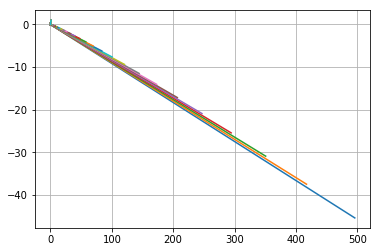

In [51]:
import matplotlib.pyplot as plt
import numpy as np


a = 1
b = -1
c = 1
d = 0


def F(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]


def F2(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.grid(True)

ds = np.linspace(-0.1, 0.1, 100)
for j in range(len(ds)):
    c = ds[j]
    
    X = [1]
    Y = [1]

    for i in range(100):
        point = F2([X[i], Y[i]])
        X.append(point[0])
        Y.append(point[1])
    
    ax1.plot(X, Y)

    #plt.legend(ds)
    ds[j] = round(ds[j], 2)

fig.show()

## 3d
With $(a, b, c, d) = (1, -1, 1, 0)$ and (roughly) $e, f < -0.9$ or $e, f > 0.3$, the system will overflow within 100 iterations. 'Result too large'.
At $e, f \approx 0$, you get the familiar square from 1a. $|e|, |f| > 0$ causes an inward spiral.

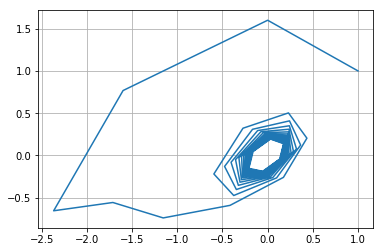

In [52]:
a = 1
b = -1
c = 1
d = 0
e = 0.3
f = 0.3

def F(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]

def F2(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y + e*x**2 + f*y**2
    
    return [xn, yn]


X = [1]
Y = [1]


for i in range(100):
    point = F2([X[i], Y[i]])
    #points.append(F(points[i]))
    X.append(point[0])
    Y.append(point[1])


# Plotting
import matplotlib.pyplot as plt

plt.grid()
plt.plot(X, Y)
plt.show()